Before we get to the actual task you will have to run the following code cells. These get the colaboratory backend set up properly.

In [ ]:
# basic libraries you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This import is needed to process text
from sklearn.feature_extraction.text import CountVectorizer

# the model you will train
from sklearn.naive_bayes import BernoulliNB

# for cross validation
from sklearn.model_selection import StratifiedKFold

# needed for model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

# The following is code for uploading a file to the colab.research.google 
# environment.

# library for uploading files
from google.colab import files 

# makes experiments reproducible
np.random.seed(1337)

def upload_files():
    # initiates the upload - follow the dialogues that appear
    uploaded = files.upload()

    # verify the upload
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

    # uploaded files need to be written to file to interact with them
    # as part of a file system
    for filename in uploaded.keys():
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

# Naive Bayes Task

For this task,  you will build and evaluate a spam filter. You will use the spam.csv dataset we provided. You can find information about the dataset here:

https://www.kaggle.com/uciml/sms-spam-collection-dataset

We want you to use cross validation to estimate the performance of a Naive Bayes model at predicting spam or ham (aka non-spam).  You should visualize the effects of a decision threshold using a ROC curve. We will provide code for making the visualization and for working with text.


### Load Data

Upload the spam.csv dataset. Running the following code will prepare the data into two series (named `text` and `labels`). Feel free to look at the series after loading.

In [ ]:
# upload spam.csv
upload_files()

Saving spam.csv to spam.csv
User uploaded file "spam.csv" with length 503663 bytes


In [ ]:
# loads the data. The Unnamed columns and latin-encoding are to deal
# with some irregularities in the text.
spam_df = pd.read_csv("spam.csv", encoding="latin-1")
spam_df = spam_df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
spam_df.columns = ["spam_or_ham", "text"]

spam_label = spam_df.spam_or_ham
text = spam_df.text
labels = spam_label.apply(lambda x: 1 if x=="spam" else 0)



In [ ]:
# run any EDA you want here. Be careful not to modify the data.

In [ ]:
spam_df.head()

,spam_or_ham,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam_df.describe()

,spam_or_ham,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   spam_or_ham  5572 non-null   object
 1   text         5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Text Transformation

This is probably the first time many of you have worked with text so we are providing some code you can use to process the text. The key thing to understand here is that text needs to be transformed to a mathematical representation in order for use in a machine learning algorithm. We do that by creating a vector out of each line of text. Each dimension in the vector represents a word; if that word exists in the text that dimension's value is 1, otherwise the value is 0. Don't worry about having to implement this yourself. Here are some sklearn functions you can use in your code. Apply this transformation to your training set before you fit your model:

```
vectorizer = CountVectorizer(stop_words="english", binary=True)
train_vectors = vectorizer.fit_transform(train_text)
```

Something to note is that the vector transformation can only use words that are seen in the training set. This is to simulate a real experiment where you cannot see the test set before it is time to make a prediction. Because of this, you can't "vectorize" the whole dataset at once. You need to "fit" the vectorizer to the training set and then transform the test set with it before you make you prediction. Be sure to call this function before predicting on your test set:

```
vectorizer.transform(test_text)
```


### Cross Validation and Evaluation

This is where you can write your code. Your goals this time are:

*   Perform 5-fold cross validation using the Naive Bayes model
*   Print evaluation metrics
*   Visualize the prediction threshold with a ROC curve

### The Model

Here is the information you will need to accomplish this task. First, the model itself. Since our feature representation will be in terms of 1s and 0s, you can use the Bernoulli implementation of Naive Bayes:

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

Default parameters should be sufficient. Take a look at the methods offered here. You should already be familiar with `fit` and `predict`. Another one you will need to use is `predict_proba`. `predict` returns 1s and 0s based on a 0.5 threshold. `predict_proba` returns a number between 0.0 and 1.0 for each sample. This distinction might sound a little subtle but it is important. When evaluating the classifier, the functions that compute evaluation metrics typically need 1s and 0s as input (so you will want to store the results of `predict`). Our function we will provide for computing the ROC curve needs probabilities as input (so you will want to store the results of `predict_proba`).

### Evaluation Metrics

Before, we had you print out specific metrics. This time you can use a single function to print out some typical metrics. Use the `classification_report` function from sklearn after your CV:

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

```
classification_report(true_labels, predictions)
```

### ROC curve

Run the code below and make use of our function for displaying the ROC curve. As I explained above, you need predictions as probabilities for input to this function.

### Summary

So, in summary, here is the program you need to implement:

*  Do 5-fold cross validation
*  For each fold, fit and transform the training text using the code we provided above
*  For each fold, train the BernoulliNB model
*  For each fold, transform the test text to vectors with the code we provided above
*  For each fold, predict the label of the test text vectors
*  After the cross validation, print evaluation metrics using the classification report
*  After the cross validaton, use our function to display the ROC curve prediction

And remember, if you get stuck ask questions! Chances are if something isn't clear to you, that same thing isn't clear to others as well.



In [ ]:
# Run this so you can use this function!!

def display_roc_curve(total_labels, total_probs):
    """
    args:
        total_labels - list of true labels
        total_probs - correspond list of probability predictions for samples
                      aka output of predict_proba
    """
    total_probs = np.array(total_probs)
    fpr, tpr, thresholds = roc_curve(total_labels, total_probs[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
# Your code goes here

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True)

preds= []
lbls = []

proba = []


for train_indices, test_indices in skf.split(text, labels):
    train_features = text.iloc[train_indices]
    train_labels = labels.iloc[train_indices]


    vectorizer = CountVectorizer(stop_words="english", binary=True) # setting an instance of CountVectorizer
    train_vectors = vectorizer.fit_transform(train_features) # fitting the CountVectorizer with train features and transforming it. 
    # train vectors is now matrix of token counts of words

    
    model = BernoulliNB() #sets up an instance of Naive Bayes
    model.fit(train_vectors,train_labels) #fits the naive bayes with vectors and labels

    test_features = text.iloc[test_indices] 
    test_labels = labels.iloc[test_indices]

    test_vectors = vectorizer.transform(test_features) #transforms test features
    
    print (f"Training size: {len(train_features)}, Test size: {len(test_features)}")
    


    preds.extend(model.predict(test_vectors))
    lbls.extend(test_labels)
    proba.extend(model.predict_proba(test_vectors))


Training size: 4457, Test size: 1115
Training size: 4457, Test size: 1115
Training size: 4458, Test size: 1114
Training size: 4458, Test size: 1114
Training size: 4458, Test size: 1114


In [ ]:

print(np.array(proba)[:,1])

[1.64990011e-10 3.37407382e-11 1.00000000e+00 ... 7.40837768e-12
 1.16980252e-10 6.94131745e-10]


In [ ]:
#retraining the model with all data and feeding some spam-like strings

train_full_vector = vectorizer.fit_transform(text)
model_final = BernoulliNB()
model_final.fit(train_full_vector, labels)

#Decision Tree

#Use tfidvectorizer

new_data = ["WINNER!! As a valued network Reliance customer you won 4 tickets. Reply now...", 
            "Hi Marcin, can you send me the answers...",
            "WINNER!! As a valued network Reliance customer you won. Call back...",
            "WINNER!! As a valued network Reliance customer you won. Reply now..."]

new_data_vector = vectorizer.transform(new_data)

model_final.predict(new_data_vector)

#shows that first one is spam, 2nd and 3rd one isn't (even tho 3rd one looks like spam) and 4th one is...

array([1, 0, 0, 1])

In [ ]:
print(classification_report(lbls, preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4825
           1       1.00      0.80      0.89       747

    accuracy                           0.97      5572
   macro avg       0.98      0.90      0.94      5572
weighted avg       0.97      0.97      0.97      5572



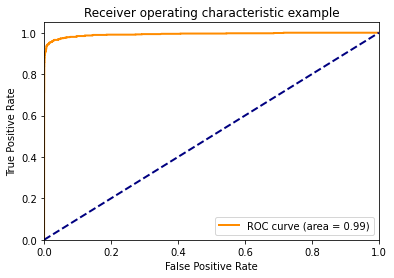

In [ ]:
display_roc_curve(lbls, proba)

### Discussion and Optional Extras

Here are some extra tasks to think about if you finish early:



*   Based on the ROC visualization, what threshold would you use when deploying this model? Why?
*   Modify the vectorizer to use word counts instead of 1s and 0s. When you do this you will have to use the MultinomailNB model instead (http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html). Compare the performance of both of your models after.


